In [1]:
import sys

sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

from utils.dataio import *
from utils.visualization import *

DATA_DIR = '../data/'
RESULTS_PATH = '../results_new/in_vivo/'

In [2]:
# Load configuration file.
config = load_config('../config.yaml')

### _In vivo_ Mouse Liver

In [3]:
task_params = config['in_vivo']
IP_max, IP_min, SOS_max, SOS_min = task_params['IP_max'], task_params['IP_min'], task_params['SOS_max'], task_params['SOS_min']
norm_ip = Normalize(vmax=IP_max, vmin=IP_min)
norm_sos = Normalize(vmax=SOS_max, vmin=SOS_min)

#### Delay-and-sum

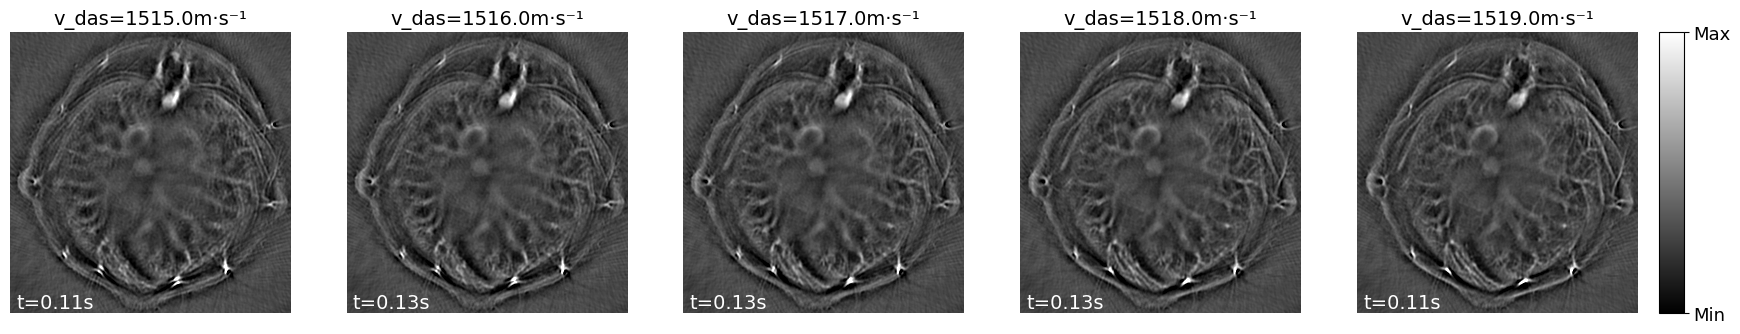

In [4]:
v_das_list = [1515, 1516, 1517, 1518, 1519]

fig = plt.figure(figsize=(21,5))
for idx, v_das in enumerate(v_das_list):
    params = 'v_das={:.1f}m·s⁻¹'.format(v_das)
    IP_rec = load_mat(os.path.join(RESULTS_PATH, 'DAS', params, 'IP_rec.mat'))
    IP_rec = standardize(IP_rec)
    log = load_log(os.path.join(RESULTS_PATH, 'DAS', params, 'log.json'))
    ax = plt.subplot(1,5,idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm_ip)
    plt.axis('off')
    plt.title('v_das={:.1f}m·s⁻¹'.format(v_das), fontsize=14)
    plt.text(s='t={:.2f}s'.format(log['time']), x=12, y=550, fontsize=14, color='white')
    if (idx+1) % 5 == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_ip)
        cb.set_ticks([IP_max, IP_min])
        cb.set_ticklabels(['Max', 'Min'], fontsize=13)

#### Dual-SOS DAS

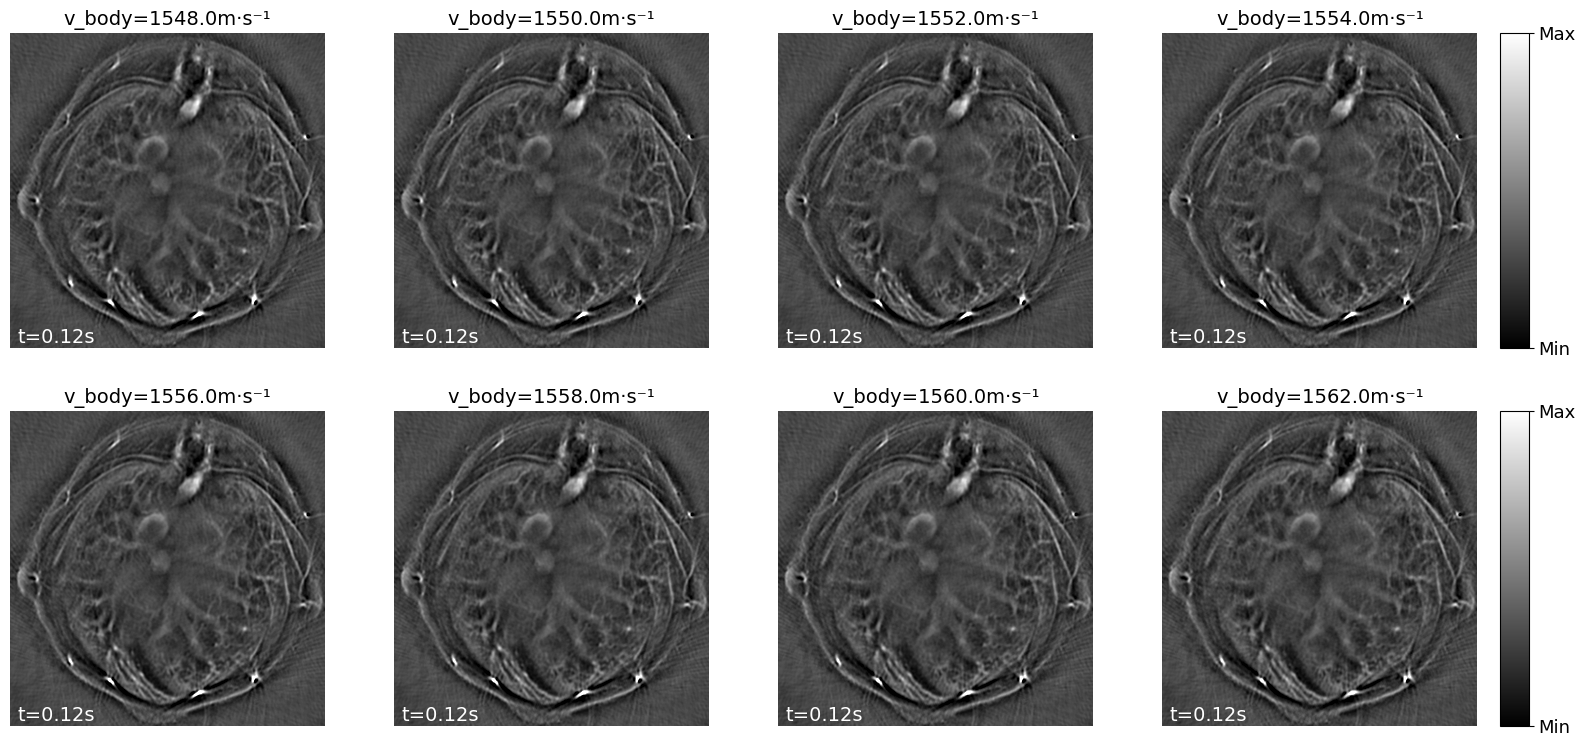

In [5]:
v_body_list = [1548, 1550, 1552, 1554, 1556, 1558, 1560, 1562]

fig = plt.figure(figsize=(19,9))
for idx, v_body in enumerate(v_body_list):
    params = 'v_body={:.1f}m·s⁻¹'.format(v_body)
    IP_rec = load_mat(os.path.join(RESULTS_PATH, 'Dual-SOS_DAS', params, 'IP_rec.mat'))
    IP_rec = standardize(IP_rec)
    log = load_log(os.path.join(RESULTS_PATH, 'Dual-SOS_DAS', params, 'log.json'))
    ax = plt.subplot(2,4,idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm_ip)
    plt.axis('off')
    plt.title('v_body={:.1f}m·s⁻¹'.format(v_body), fontsize=14)
    plt.text(s='t={:.2f}s'.format(log['time']), x=12, y=550, fontsize=14, color='white')
    if (idx+1) % 4 == 0:
        cax = fig.add_axes([ax.get_position().x1+0.012, ax.get_position().y0, 0.015, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_ip)
        cb.set_ticks([IP_max, IP_min])
        cb.set_ticklabels(['Max', 'Min'], fontsize=13)

#### NF-APACT

In [6]:
bs_df = 64
lr_nf_df = 2e-3
n_delays_df = 16
hls_df, hfs_df = 0, 128
n_epochs_df = 10

Learning rate.

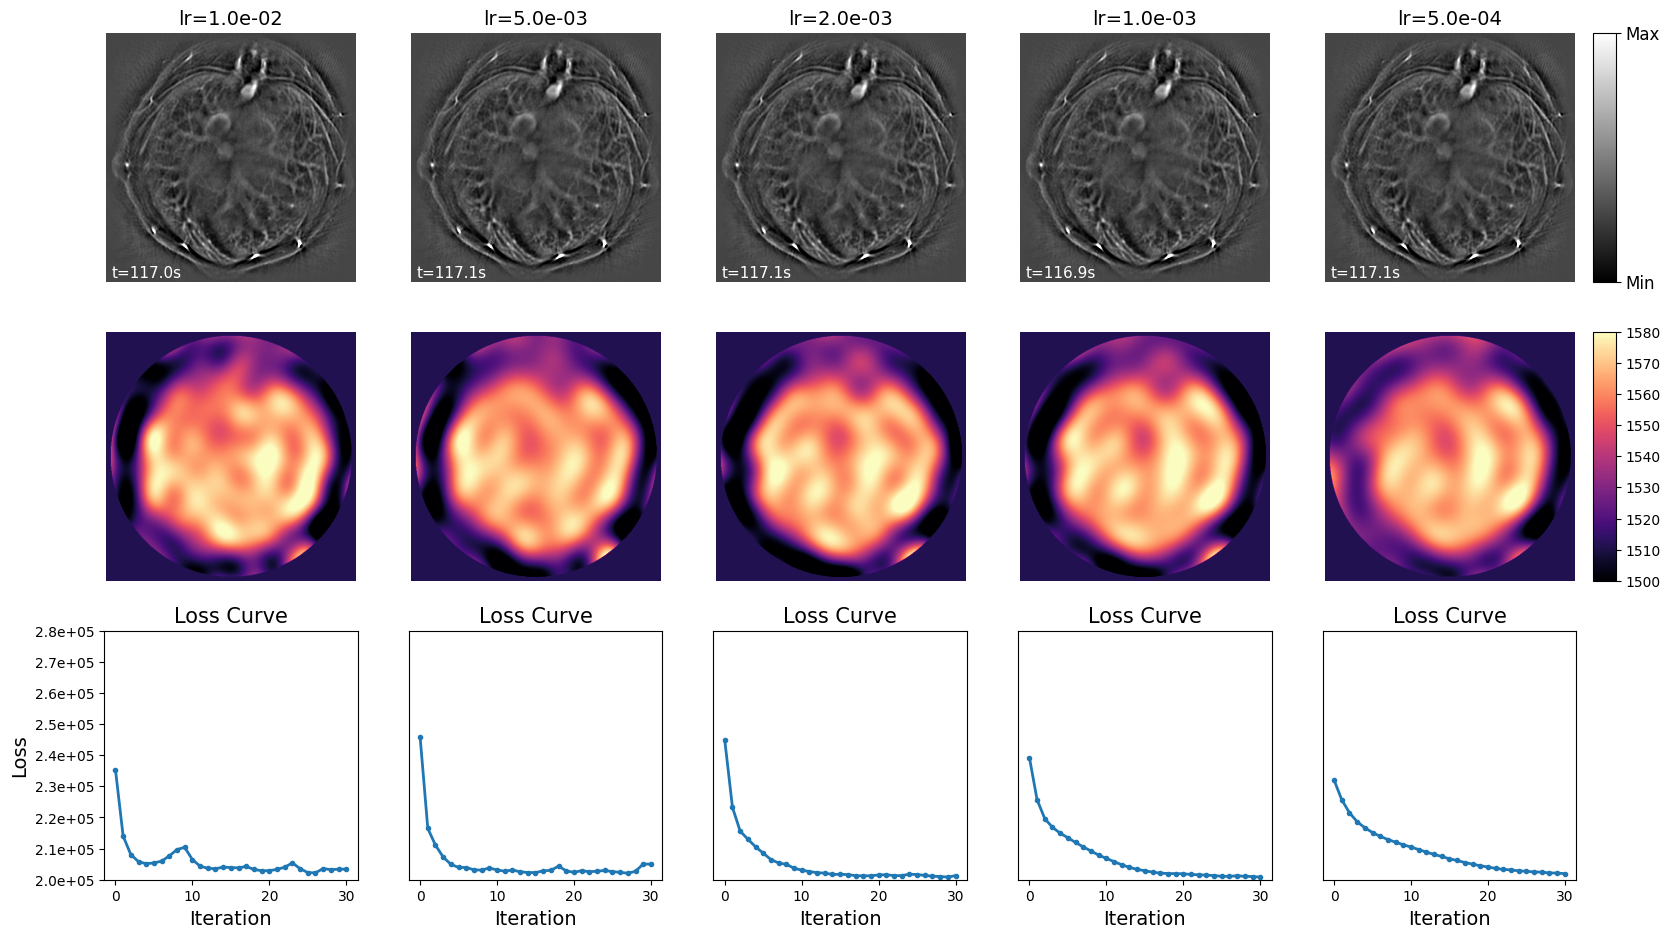

In [7]:
lr_list = [1e-2,5e-3,2e-3,1e-3,5e-4]

fig = plt.figure(figsize=(19,11))
for idx, lr in enumerate(lr_list):
    params = f'{n_delays_df}delays_{hls_df}lyrs_{hfs_df}fts_{30}epochs_bs={bs_df}_lr={lr:.1e}'
    IP_rec = load_mat(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'IP_rec.mat'))
    SOS_rec = load_mat(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'SOS_rec.mat'))
    IP_rec = standardize(IP_rec)
    log = load_log(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'log.json'))
    ax = plt.subplot(3,len(lr_list),idx+1)
    plt.imshow(IP_rec, cmap='gray', norm=norm_ip)
    plt.axis('off')
    plt.text(s='t={:.1f}s'.format(log['time']), x=12, y=550, fontsize=11, color='white')
    plt.title('lr={:.1e}'.format(lr), fontsize=14)
    if (idx+1) % len(lr_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_ip)
        cb.set_ticks([IP_max, IP_min])
        cb.set_ticklabels(['Max', 'Min'], fontsize=12)
    
    ax = plt.subplot(3,len(lr_list),idx+1+len(lr_list))
    plt.imshow(SOS_rec, cmap='magma', norm=norm_sos)
    plt.axis('off')
    if (idx+1) % len(lr_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_sos)
        
    ax = plt.subplot(3,len(lr_list),idx+1+2*len(lr_list))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    plt.plot(range(len(log['loss'])), log['loss'], '-o', markersize=3, linewidth=2, label='loss')
    plt.ylim([2.0e5,2.8e5])
    plt.title("Loss Curve", fontsize=15)
    plt.xlabel("Iteration", fontsize=14)
    if idx == 0:
        plt.ylabel("Loss", fontsize=14)
    else:
        plt.yticks([],fontsize=9)

Number of delays.

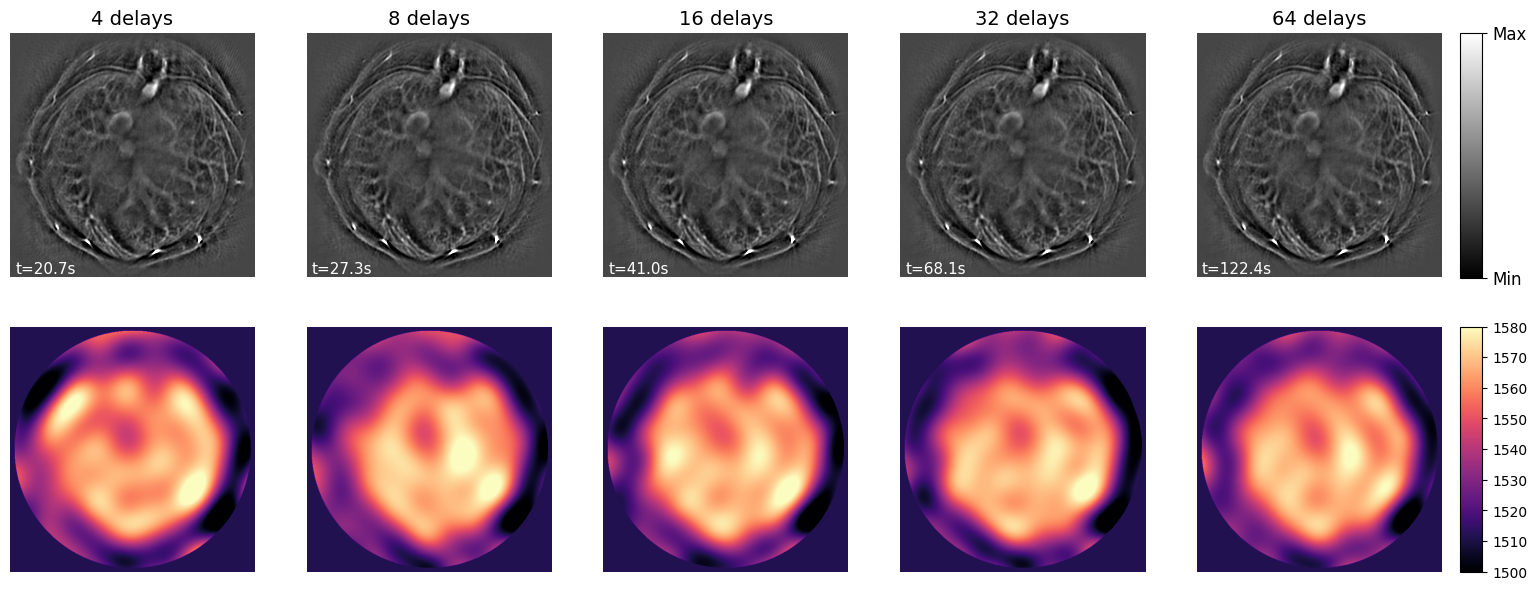

In [8]:
n_delays_list = [4, 8, 16, 32, 64]

fig = plt.figure(figsize=(18.5,7))
for idx, n_delays in enumerate(n_delays_list):
    params = f'{n_delays}delays_{hls_df}lyrs_{hfs_df}fts_{n_epochs_df}epochs_bs={64}_lr={lr_nf_df:.1e}'
    ip_rec = load_mat(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'IP_rec.mat'))
    sos_rec = load_mat(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'SOS_rec.mat'))
    ip_rec = standardize(ip_rec)
    log = load_log(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'log.json'))
    ax = plt.subplot(2,len(n_delays_list),idx+1)
    plt.imshow(ip_rec, cmap='gray', norm=norm_ip)
    plt.axis('off')
    plt.text(s='t={:.1f}s'.format(log['time']), x=12, y=550, fontsize=11, color='white')
    plt.title('{} delays'.format(n_delays), fontsize=14)
    if (idx+1) % len(n_delays_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_ip)
        cb.set_ticks([IP_max, IP_min])
        cb.set_ticklabels(['Max', 'Min'], fontsize=12)
    
    ax = plt.subplot(2,len(n_delays_list),idx+1+len(n_delays_list))
    plt.imshow(sos_rec, cmap='magma', norm=norm_sos)
    plt.axis('off')
    if (idx+1) % len(n_delays_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_sos)

Network structure (Positional encoding, number of hidden layers and hidden features).

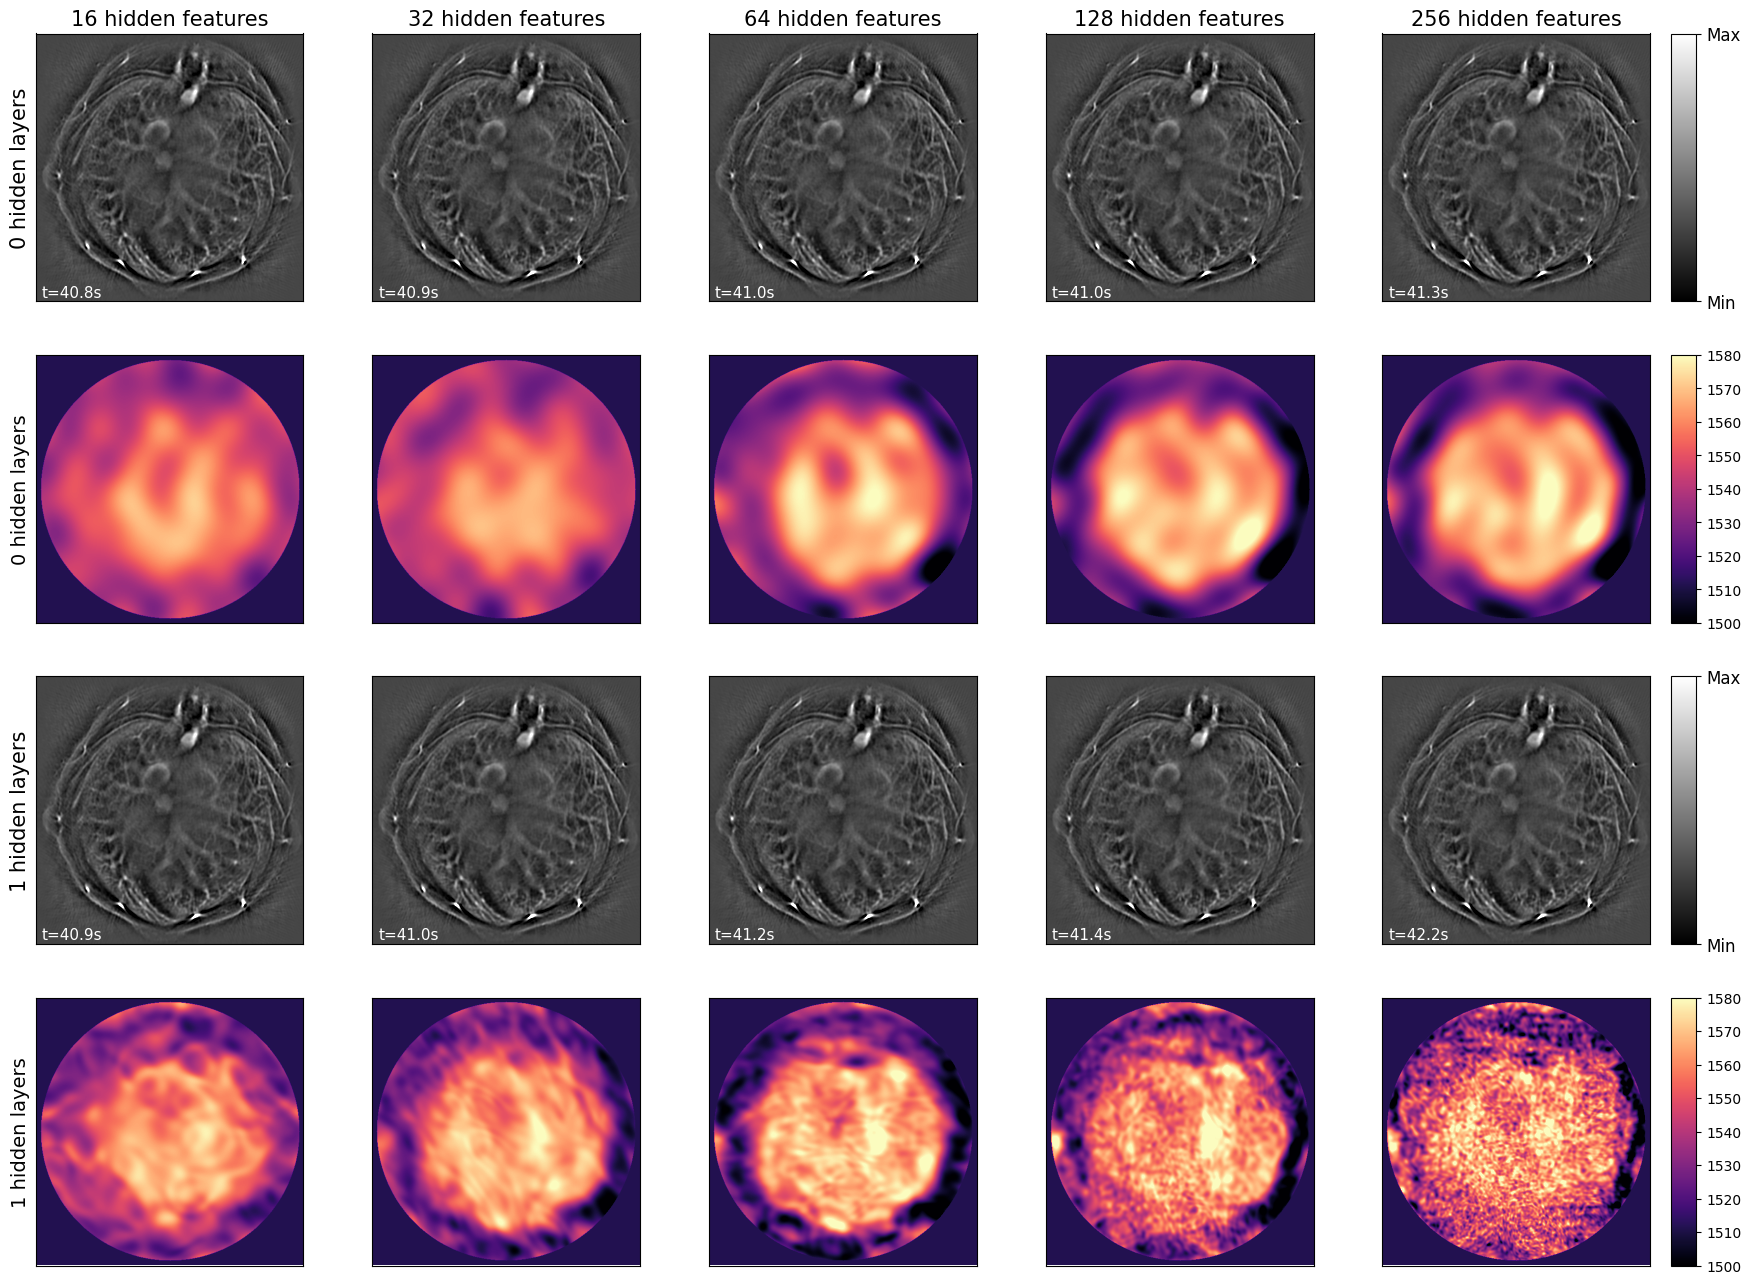

In [9]:
hls_list, hfs_list = [0, 1], [16, 32, 64, 128, 256]

fig = plt.figure(figsize=(21,16))
for i, hfs in enumerate(hfs_list):
    for j, hls in enumerate(hls_list):
        params = f'{n_delays_df}delays_{hls}lyrs_{hfs}fts_{n_epochs_df}epochs_bs={bs_df}_lr={lr_nf_df:.1e}'
        ip_rec = load_mat(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'IP_rec.mat'))
        sos_rec = load_mat(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'SOS_rec.mat'))
        ip_rec = standardize(ip_rec)
        log = load_log(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'log.json'))
        ax = plt.subplot(2*len(hls_list),len(hfs_list),i+1+len(hfs_list)*2*j)
        plt.imshow(ip_rec, cmap='gray', norm=norm_ip)
        plt.xticks([])
        plt.yticks([])
        plt.text(s='t={:.1f}s'.format(log['time']), x=12, y=550, fontsize=11, color='white')
        if j == 0:
            plt.title('{} hidden features'.format(hfs), fontsize=15)
        if i == 0:
            plt.ylabel('{} hidden layers'.format(hls), fontsize=15)
        if (i+1) % len(hfs_list) == 0:
            cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
            cb = plt.colorbar(cax=cax, norm=norm_ip)
            cb.set_ticks([IP_max, IP_min])
            cb.set_ticklabels(['Max', 'Min'], fontsize=12)
        
        ax = plt.subplot(2*len(hls_list),len(hfs_list),i+1+len(hfs_list)*(1+2*j))
        plt.imshow(sos_rec, cmap='magma', norm=norm_sos)
        plt.xticks([])
        plt.yticks([])
        if i == 0:
            plt.ylabel('{} hidden layers'.format(hls), fontsize=14)
        if (i+1) % len(hfs_list) == 0:
            cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
            cb = plt.colorbar(cax=cax, norm=norm_sos)

TV Regularization

In [10]:
# lam_list = [0.0, 1e-5, 2e-5, 5e-5, 1e-4]

# fig = plt.figure(figsize=(19,11))

# for i, lam in enumerate(lam_list):
#     params = f'{32}delays_{1}lyrs_{64}fts' + ('_TV={:.1e}'.format(lam) if lam != 0 else '') + '_{}epochs_bs={}_lr={:.1e}'.format(10, 64, 1e-3)
#     ip_rec = load_mat(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'IP_rec.mat'))
#     sos_rec = load_mat(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'SOS_rec.mat'))
#     ip_rec = standardize(ip_rec)
#     log = load_log(os.path.join(RESULTS_PATH, 'NF-APACT', params, 'log.json'))
#     ax = plt.subplot(3,len(lam_list),i+1)
#     plt.imshow(ip_rec, cmap='gray', norm=norm_ip)
#     plt.axis('off')
#     plt.text(s='t={:.1f}s'.format(log['time']), x=12, y=550, fontsize=11, color='white')
#     plt.title('$\lambda_{TV}$'+'={:.1e}'.format(lam), fontsize=15)

#     if (i+1) % len(lam_list) == 0:
#         cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.01, ax.get_position().height])
#         cb = plt.colorbar(cax=cax, norm=norm_ip)
#         cb.set_ticks([IP_max, IP_min])
#         cb.set_ticklabels(['Max', 'Min'], fontsize=12)
    
#     ax = plt.subplot(3,len(lam_list),i+1+len(lam_list))
#     plt.imshow(sos_rec, cmap='magma', norm=norm_sos)
#     plt.axis('off')
#     if (i+1) % len(lam_list) == 0:
#         cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.01, ax.get_position().height])
#         cb = plt.colorbar(cax=cax, norm=norm_sos)
        
#     ax = plt.subplot(3,len(lam_list),i+1+2*len(lam_list))
#     ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
#     plt.plot(range(len(log['loss'])), log['loss'], '-o', markersize=3, linewidth=2, label='loss')
#     plt.ylim([2.03e5,2.51e5])
#     plt.title("Loss Curve", fontsize=15)
#     plt.xlabel("Iteration", fontsize=14)
#     if i == 0:
#         plt.ylabel("Loss", fontsize=14)
#     else:
#         plt.yticks([],fontsize=9)

### Pixel Grid

In [11]:
lam_tv_df = 1.0e-4
lr_pg_df = 0.1

Learning rate.

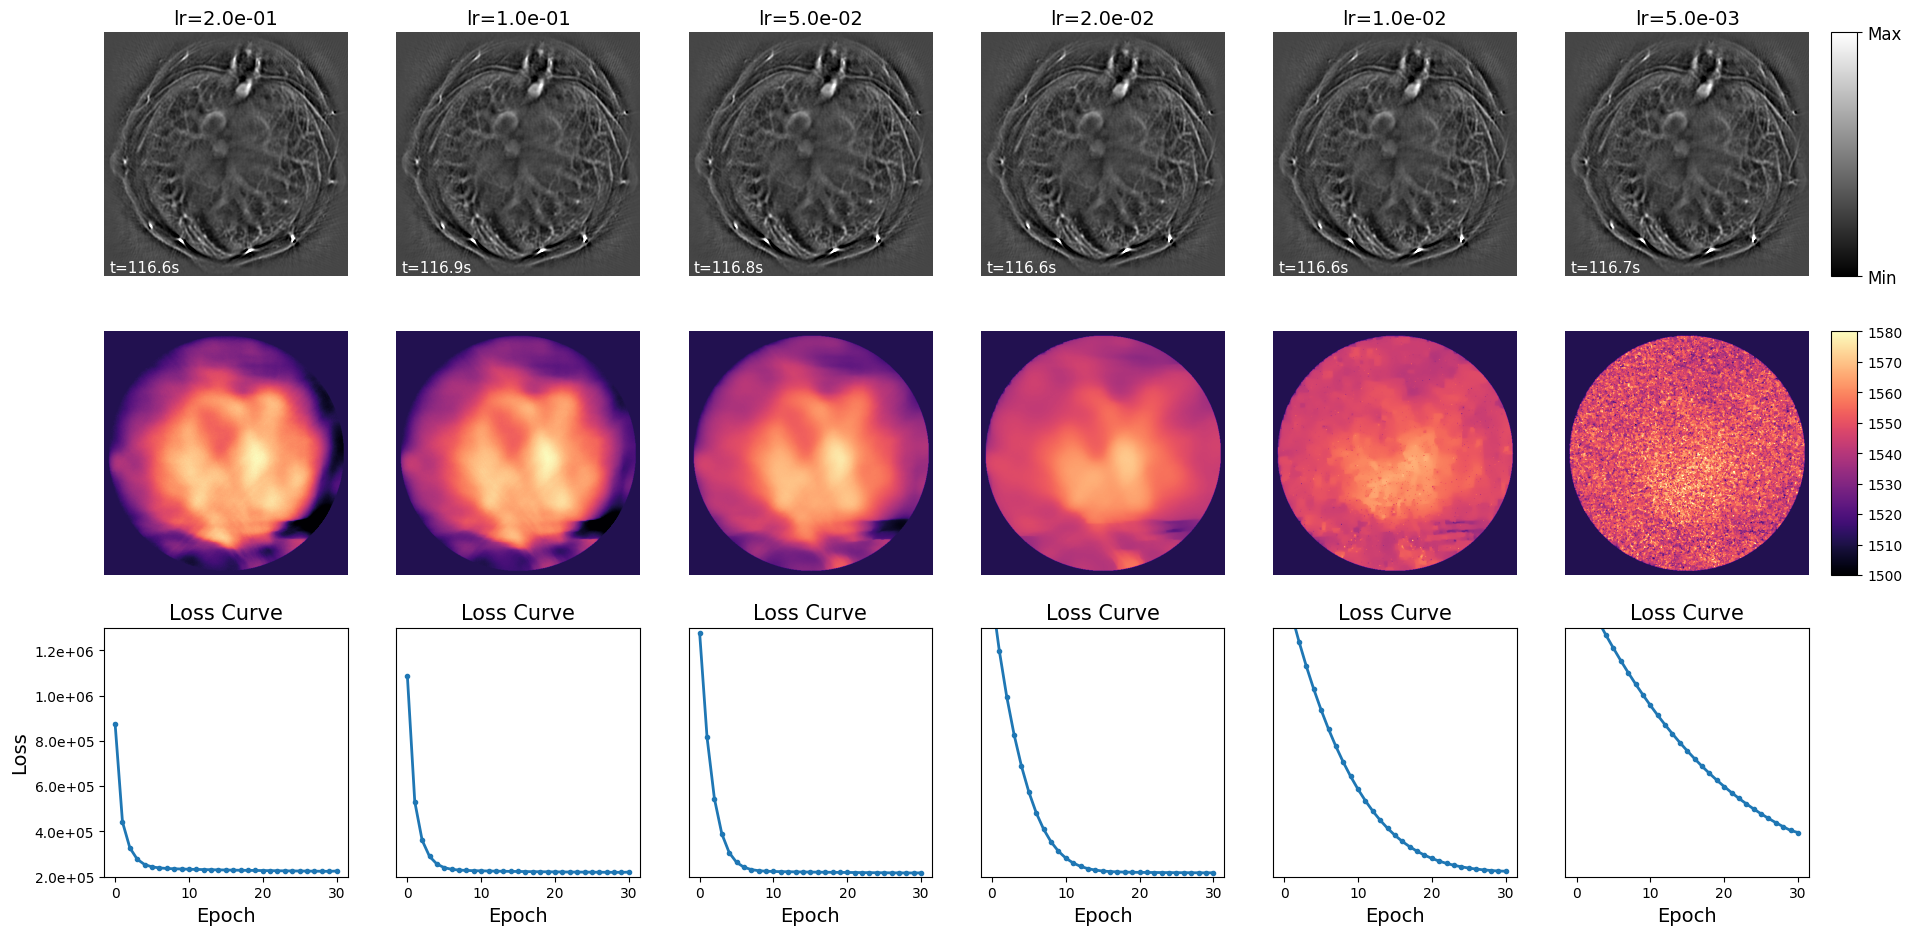

In [12]:
lr_list = [2e-1,1e-1,5e-2,2e-2,1e-2,5e-3]

fig = plt.figure(figsize=(22,11))
for idx, lr in enumerate(lr_list):
    params = f'{n_delays_df}delays_TV={lam_tv_df:.1e}_{30}epochs_bs={bs_df}_lr={lr:.1e}'
    ip_rec = load_mat(os.path.join(RESULTS_PATH, 'PG', params, 'IP_rec.mat'))
    sos_rec = load_mat(os.path.join(RESULTS_PATH, 'PG', params, 'SOS_rec.mat'))
    ip_rec = standardize(ip_rec)
    log = load_log(os.path.join(RESULTS_PATH, 'PG', params, 'log.json'))
    ax = plt.subplot(3,len(lr_list),idx+1)
    plt.imshow(ip_rec, cmap='gray', norm=norm_ip)
    plt.axis('off')
    plt.text(s='t={:.1f}s'.format(log['time']), x=12, y=550, fontsize=11, color='white')
    plt.title('lr={:.1e}'.format(lr), fontsize=14)
    if (idx+1) % len(lr_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_ip)
        cb.set_ticks([IP_max, IP_min])
        cb.set_ticklabels(['Max', 'Min'], fontsize=12)
    
    ax = plt.subplot(3,len(lr_list),idx+1+len(lr_list))
    plt.imshow(sos_rec, cmap='magma', norm=norm_sos)
    plt.axis('off')
    if (idx+1) % len(lr_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.012, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_sos)
        
    ax = plt.subplot(3,len(lr_list),idx+1+2*len(lr_list))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    plt.plot(range(len(log['loss'])), log['loss'], '-o', markersize=3, linewidth=2, label='loss')
    plt.ylim([2.0e5,1.3e6])
    plt.title("Loss Curve", fontsize=15)
    plt.xlabel("Epoch", fontsize=14)
    if idx == 0:
        plt.ylabel("Loss", fontsize=14)
    else:
        plt.yticks([],fontsize=9)

Number of delays.

TV regularization.

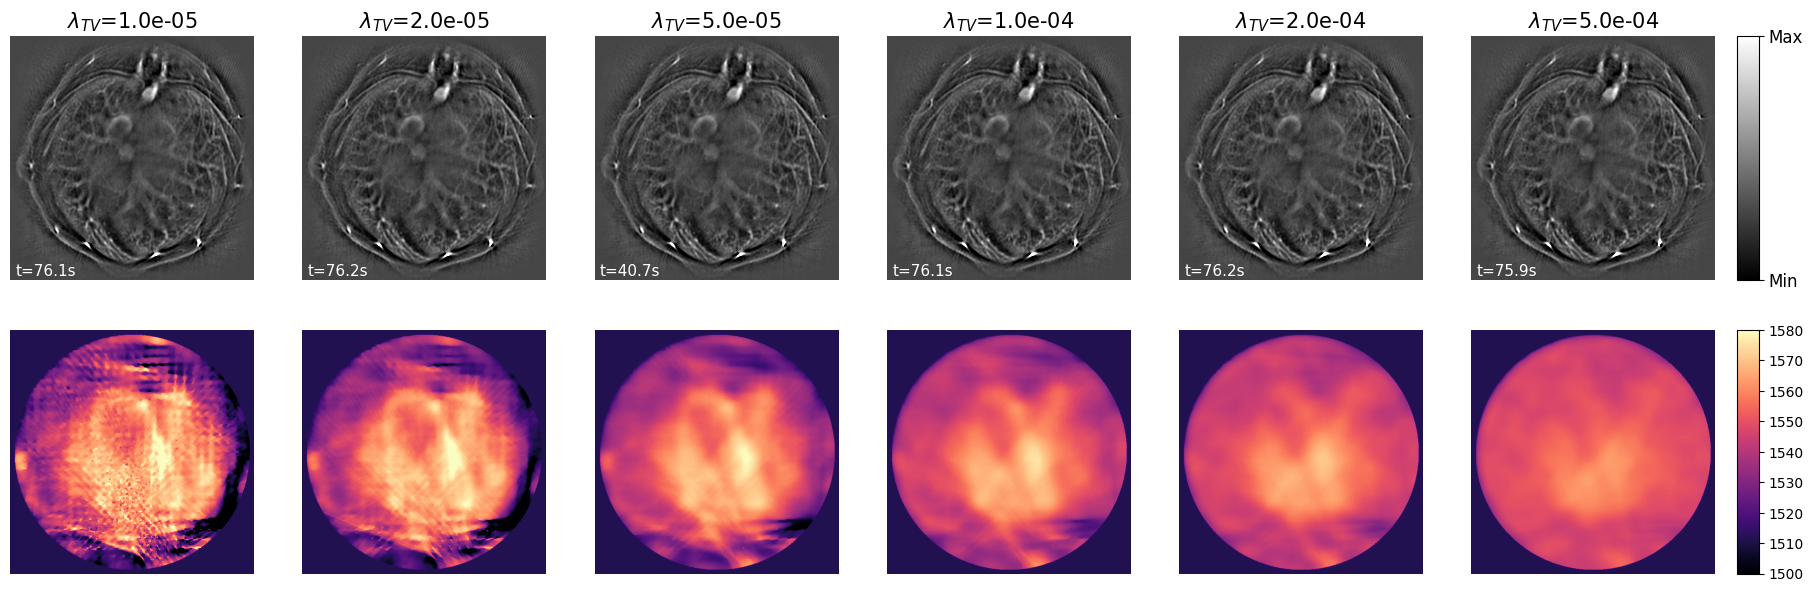

In [13]:
lam_list = [1e-5,2e-5,5e-5,1e-4,2e-4,5e-4]

fig = plt.figure(figsize=(22,7))
for i, lam in enumerate(lam_list):
    params =f'{n_delays_df}delays_TV={lam:.1e}_{n_epochs_df}epochs_bs={bs_df}_lr={lr_pg_df:.1e}'
    ip_rec = load_mat(os.path.join(RESULTS_PATH, 'PG', params, 'IP_rec.mat'))
    sos_rec = load_mat(os.path.join(RESULTS_PATH, 'PG', params, 'SOS_rec.mat'))
    ip_rec = standardize(ip_rec)
    log = load_log(os.path.join(RESULTS_PATH, 'PG', params, 'log.json'))
    ax = plt.subplot(2,len(lam_list),i+1)
    plt.imshow(ip_rec, cmap='gray', norm=norm_ip)
    plt.axis('off')
    plt.text(s='t={:.1f}s'.format(log['time']), x=12, y=550, fontsize=11, color='white')
    plt.title('$\lambda_{TV}$'+'={:.1e}'.format(lam), fontsize=15)

    if (i+1) % len(lam_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.01, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_ip)
        cb.set_ticks([IP_max, IP_min])
        cb.set_ticklabels(['Max', 'Min'], fontsize=12)
    
    ax = plt.subplot(2,len(lam_list),i+1+len(lam_list))
    plt.imshow(sos_rec, cmap='magma', norm=norm_sos)
    plt.axis('off')
    if (i+1) % len(lam_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.01, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_sos)

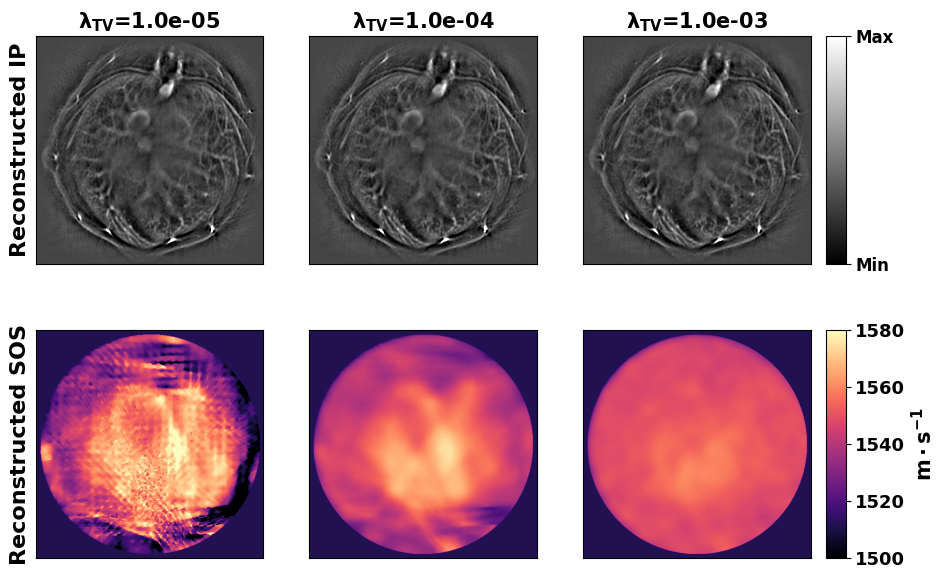

In [34]:
lam_list = [1e-5,1e-4,1e-3]

fig = plt.figure(figsize=(10,7))
for i, lam in enumerate(lam_list):
    params =f'{n_delays_df}delays_TV={lam:.1e}_{n_epochs_df}epochs_bs={bs_df}_lr={lr_pg_df:.1e}'
    ip_rec = load_mat(os.path.join(RESULTS_PATH, 'PG', params, 'IP_rec.mat'))
    sos_rec = load_mat(os.path.join(RESULTS_PATH, 'PG', params, 'SOS_rec.mat'))
    ip_rec = standardize(ip_rec)
    log = load_log(os.path.join(RESULTS_PATH, 'PG', params, 'log.json'))
    ax = plt.subplot(2,len(lam_list),i+1)
    plt.imshow(ip_rec, cmap='gray', norm=norm_ip)
    plt.xticks([])
    plt.yticks([])
    plt.title('$\mathbf{\lambda_{TV}}$'+'={:.1e}'.format(lam), fontsize=15, fontweight='bold')
    if i == 0:
        plt.ylabel('Reconstructed IP', fontsize=16, fontweight='bold')
    if (i+1) % len(lam_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.015, ax.get_position().y0, 0.02, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_ip)
        cb.set_ticks([IP_max, IP_min])
        cb.set_ticklabels(['Max', 'Min'], fontsize=12, fontweight='bold')
    
    ax = plt.subplot(2,len(lam_list),i+1+len(lam_list))
    plt.imshow(sos_rec, cmap='magma', norm=norm_sos)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.ylabel('Reconstructed SOS', fontsize=16, fontweight='bold')
    if (i+1) % len(lam_list) == 0:
        cax = fig.add_axes([ax.get_position().x1+0.015, ax.get_position().y0, 0.02, ax.get_position().height])
        cb = plt.colorbar(cax=cax, norm=norm_sos)
        cb.set_ticks([1500, 1520, 1540, 1560, 1580])
        cb.set_ticklabels(['1500', '1520', '1540', '1560', '1580'], fontsize=13, fontweight='bold')
        cb.set_label('$\mathbf{m \cdot s^{-1}}$', fontsize=15)
plt.savefig('figure_ablation_tv_in_vivo.png', dpi=300, bbox_inches='tight')